In [2]:
!git clone https://github.com/21-projects-for-deep-learning/CycleGAN-TensorFlow-1

Cloning into 'CycleGAN-TensorFlow'...
remote: Enumerating objects: 563, done.
remote: Total 563 (delta 0), reused 0 (delta 0), pack-reused 563
Receiving objects: 100% (563/563), 4.17 MiB | 19.49 MiB/s, done.
Resolving deltas: 100% (344/344), done.


In [0]:
import os
os.chdir("CycleGAN-TensorFlow")

In [10]:
!bash download_dataset.sh apple2orange

for details.

--2019-01-18 02:54:44--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/apple2orange.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78456409 (75M) [application/zip]
Saving to: ‘./data/apple2orange.zip’

./data/apple2orange 100%[===================>]  74.82M  3.05MB/s    in 27s     

2019-01-18 02:55:11 (2.79 MB/s) - ‘./data/apple2orange.zip’ saved [78456409/78456409]

Archive:  ./data/apple2orange.zip
   creating: ./data/apple2orange/trainA/
  inflating: ./data/apple2orange/trainA/n07740461_6908.jpg  
  inflating: ./data/apple2orange/trainA/n07740461_7635.jpg  
  inflating: ./data/apple2orange/trainA/n07740461_586.jpg  
  inflating: ./data/apple2orange/trainA/n07740461_9813.jpg  
  inflating: ./data/apple2orange/trainA/n07740461_6835.jpg  
  inflating: ./data/apple2or

In [0]:
!ls data/apple2orange

In [11]:
!python3 build_data.py \
--X_input_dir "data/apple2orange/trainA" \
--Y_input_dir "data/apple2orange/trainB" \
--X_output_file "data/apple2orange/apple.tfrecords" \
--Y_output_file "data/apple2orange/orange.tfrecords"

['Convert X data to tfrecords...',
 'WARNING:tensorflow:From build_data.py:98: FastGFile.__init__ (from tensorflow.python.platform.gfile) is deprecated and will be removed in a future version.',
 'Instructions for updating:',
 'Use tf.gfile.GFile.',
 'Processed 0/995.',
 'Processed 500/995.',
 'Done.',
 'Convert Y data to tfrecords...',
 'Processed 0/1019.',
 'Processed 500/1019.',
 'Processed 1000/1019.',
 'Done.']

In [0]:
python3 train.py \
--X "data/apple2orange/apple.tfrecords" \
--Y "data/apple2orange/orange.tfrecords" 

In [0]:
!python3 train.py \
--X "data/apple2orange/apple.tfrecords" \
--Y "data/apple2orange/orange.tfrecords" \
--load_model "checkpoints/20190118-0255"

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TFRecordDataset`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TFRecordDataset`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False

In [42]:
!ls checkpoints

20190118-0249  20190118-0255


In [43]:
!ls -lha checkpoints/20190118-0255

total 11G
drwxr-xr-x 2 root root 4.0K Jan 18 11:18 .
drwxr-xr-x 4 root root 4.0K Jan 18 02:55 ..
-rw-r--r-- 1 root root   89 Jan 18 11:17 checkpoint
-rw-r--r-- 1 root root 6.3G Jan 18 08:20 events.out.tfevents.1547780180.be3e9eaced43
-rw-r--r-- 1 root root 2.9G Jan 18 11:17 events.out.tfevents.1547801157.be3e9eaced43
-rw-r--r-- 1 root root 324M Jan 18 02:57 model.ckpt-0.data-00000-of-00001
-rw-r--r-- 1 root root  20K Jan 18 02:57 model.ckpt-0.index
-rw-r--r-- 1 root root 8.3M Jan 18 02:57 model.ckpt-0.meta
-rw-r--r-- 1 root root 324M Jan 18 08:09 model.ckpt-10000.data-00000-of-00001
-rw-r--r-- 1 root root  20K Jan 18 08:09 model.ckpt-10000.index
-rw-r--r-- 1 root root 8.3M Jan 18 08:09 model.ckpt-10000.meta
-rw-r--r-- 1 root root 324M Jan 18 08:20 model.ckpt-10354.data-00000-of-00001
-rw-r--r-- 1 root root  20K Jan 18 08:20 model.ckpt-10354.index
-rw-r--r-- 1 root root 8.3M Jan 18 08:20 model.ckpt-10354.meta
-rw-r--r-- 1 root root 324M Jan 18 11:17 model.ckpt-15196.data-00000-of-00001


In [44]:
!python export_graph.py \
--checkpoint_dir checkpoints/20190118-0255 \
--XtoY_model apple2orange.pb \
--YtoX_model orange2apple.pb \
--image_size 256

Export XtoY model...
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TFRecordDataset`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for

In [45]:
!ls -lha pretrained

total 88M
drwxr-xr-x 2 root root 4.0K Jan 18 11:19 .
drwxr-xr-x 8 root root 4.0K Jan 18 08:38 ..
-rw-r--r-- 1 root root  44M Jan 18 11:19 apple2orange.pb
-rw-r--r-- 1 root root  44M Jan 18 11:19 orange2apple.pb


In [47]:
!python inference.py \
--model pretrained/apple2orange.pb \
--input data/apple2orange/testA/n07740461_41.jpg \
--output output_sample.jpg \
--image_size 256

Instructions for updating:
Use tf.gfile.GFile.
2019-01-18 11:19:37.737406: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-01-18 11:19:37.737867: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1432] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2019-01-18 11:19:37.737929: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1511] Adding visible gpu devices: 0
2019-01-18 11:19:38.047477: I tensorflow/core/common_runtime/gpu/gpu_device.cc:982] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-01-18 11:19:38.047543: I tensorflow/core/common_runtime/gpu/gpu_device.cc:988]      0 
2019-01-18 11:19:38.047571: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1001] 0:   N 
2019-01-18 11:19:38.047814: W tensorfl

In [0]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def plot_image(img_path):
    img = Image.open(img_path)
    plt.figure()
    plt.imshow(img)
    plt.grid(False)
    plt.show()

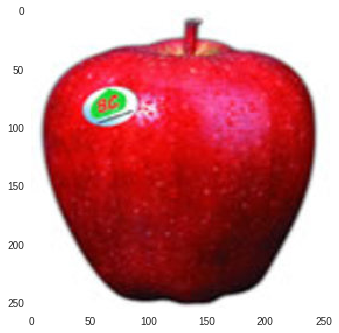

In [49]:
plot_image("data/apple2orange/testA/n07740461_41.jpg")

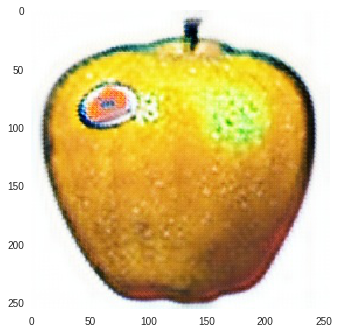

In [50]:
plot_image("output_sample.jpg")

In [60]:
!ls pretrained

apple2orange.pb  orange2apple.pb


In [61]:
!python inference.py \
--model pretrained/orange2apple.pb \
--input data/apple2orange/testB/n07749192_401.jpg \
--output output_sample_n07749192_401.jpg \
--image_size 256

Instructions for updating:
Use tf.gfile.GFile.
2019-01-18 11:25:16.132168: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-01-18 11:25:16.132578: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1432] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2019-01-18 11:25:16.132617: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1511] Adding visible gpu devices: 0
2019-01-18 11:25:16.432246: I tensorflow/core/common_runtime/gpu/gpu_device.cc:982] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-01-18 11:25:16.432320: I tensorflow/core/common_runtime/gpu/gpu_device.cc:988]      0 
2019-01-18 11:25:16.432342: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1001] 0:   N 
2019-01-18 11:25:16.432614: W tensorfl

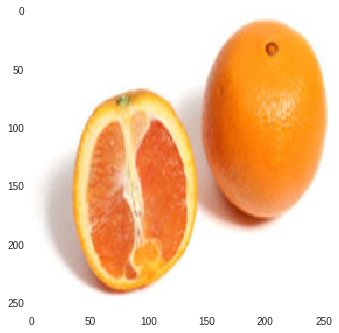

In [62]:
plot_image("data/apple2orange/testB/n07749192_401.jpg")

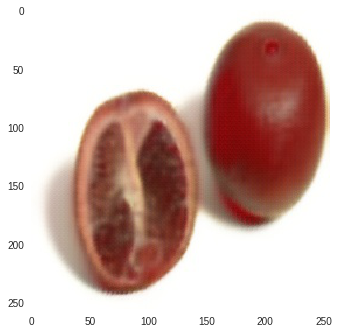

In [63]:
plot_image("output_sample_n07749192_401.jpg")